In [142]:
using DataFrames
using CSV
using Statistics
using PyPlot

In [186]:
dfs = []
for (root, dirs, files) in walkdir("./../../experimental_data/raw_data/Datasets-2021-csv")
    for f in files
        if f[end-2:end] == "csv"
            println(f)
            path = pwd()*"/../../experimental_data/raw_data/Datasets-2021-csv/"*f
            df = CSV.read(path, DataFrame,header=[:well,:bf,:gfp,:time])
            defect = split(split(f,".")[1],"-")[1]
            nuclease = split(split(f,".")[1],"-")[2]
            nuclease = nuclease == "Cas9" ? "SpCas9" : nuclease
            df[:,"experiment"] = fill(defect*"_"*nuclease,length(df[:,:time]))
            df[:,"defect"] = fill(defect,length(df[:,:time]))
            df[:,"nuclease"] = fill(nuclease,length(df[:,:time]))
            println(nuclease)
            push!(dfs,df)
        end
    end
end

CGG-Cas9.csv
SpCas9
CGG-Cpf1.csv
Cpf1
CTG-Cas9.csv
SpCas9
CTG-Cpf1.csv
Cpf1
GAA-Cas9.csv
SpCas9
GAA-Cpf1.csv
Cpf1
NR-Cas9.csv
SpCas9
NR-Cpf1.csv
Cpf1


In [187]:
data = vcat(dfs...)
CSV.write(pwd()*"/../../experimental_data/processed_data/all_experiments.csv",data)

"/Users/E/Dropbox/RESEARCH/inprogress/yeast_repair/yeast_dna_repair/code/data_processing/../../experimental_data/processed_data/all_experiments.csv"

In [188]:
gdf = groupby(data, [:experiment,:time]);

In [189]:
data_avg =  combine(gdf,:bf => mean,:gfp => mean, :defect => first,:nuclease => first,renamecols=false)
CSV.write(pwd()*"/../../experimental_data/processed_data/avg_data.csv",data_avg)

"/Users/E/Dropbox/RESEARCH/inprogress/yeast_repair/yeast_dna_repair/code/data_processing/../../experimental_data/processed_data/avg_data.csv"

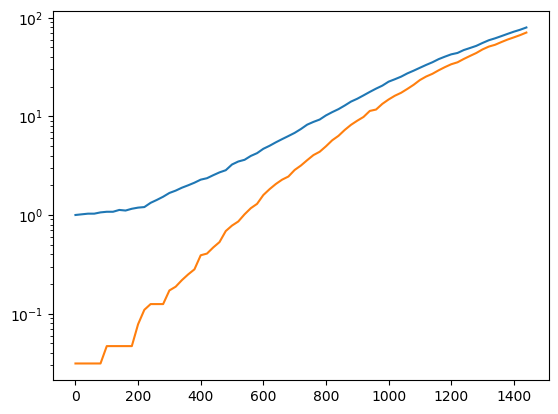

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f81432bd320>

In [165]:
plt.plot(data_avg[data_avg.experiment .== "CGG_SpCas9",:time],data_avg[data_avg.experiment .== "CGG_SpCas9",:bf])
plt.semilogy(data_avg[data_avg.experiment .== "CGG_SpCas9",:time],data_avg[data_avg.experiment .== "CGG_SpCas9",:gfp])

,experiment,time,bf,gfp,defect,nuclease
,String,Int64,Float64,Float64,String,String
1,CGG_SpCas9,0,1.0,0.03125,CGG,SpCas9
2,CGG_SpCas9,20,1.01562,0.03125,CGG,SpCas9
3,CGG_SpCas9,40,1.03125,0.03125,CGG,SpCas9
4,CGG_SpCas9,60,1.03125,0.03125,CGG,SpCas9
5,CGG_SpCas9,80,1.0625,0.03125,CGG,SpCas9
6,CGG_SpCas9,100,1.07812,0.046875,CGG,SpCas9
7,CGG_SpCas9,120,1.07812,0.046875,CGG,SpCas9
8,CGG_SpCas9,140,1.125,0.046875,CGG,SpCas9
9,CGG_SpCas9,160,1.10938,0.046875,CGG,SpCas9


In [116]:
df = dfs[2]
one_cell_wells = [well for well in unique(df.well) if df[df.well .== well,:bf][1] == 1]

105-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
  94
  95
  96
  97
  98
  99
 100
 101
 102
 103
 104
 105

In [169]:
unique(data[:,:nuclease])

4-element Array{String,1}:
 "SpCas9"
 "Cpf1"
 "as9."
 "pf1."

In [141]:
max(data[:,:time]...)/60

24.0

2-element Array{SubString{String},1}:
 "NR"
 "Cas9"